In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('banktransaction.csv')

In [37]:
df.head()
cols = df.columns

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [39]:
df['typeofaction'].unique()

array(['cash-in', 'transfer'], dtype=object)

In [40]:
# convert date into integer e.g. 20231012
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y%m%d').astype(int)

In [41]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,20190719,1,type1
1,cash-in,30105,8692,494528,20190517,1,type1
2,cash-in,30105,60094,494528,20190720,1,type1
3,cash-in,30105,20575,494528,20190703,1,type1
4,cash-in,30105,45938,494528,20190526,1,type1


In [42]:
df.isnull().sum()

typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64

In [43]:
df.shape

(2340, 7)

1399
2340


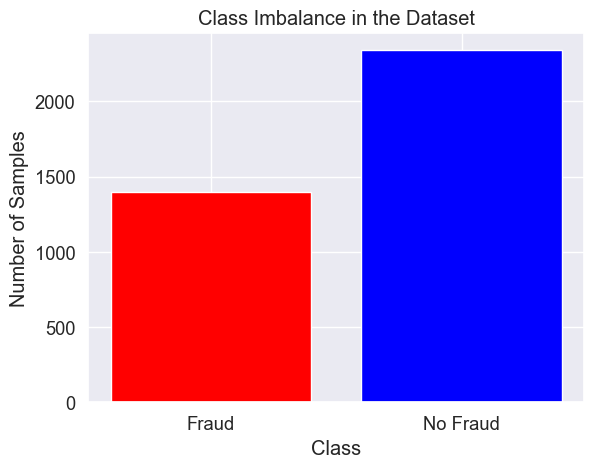

In [44]:
fraud_count = (df['isfraud'] == 1).sum()
no_fraud_count = len(df['isfraud']== 0)

print(fraud_count)
print(no_fraud_count)

# Create a bar plot to display the class imbalance
plt.bar(['Fraud', 'No Fraud'], [fraud_count, no_fraud_count], color=['red', 'blue'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Imbalance in the Dataset')
plt.show()

In [45]:
df['typeofaction'].value_counts()

typeofaction
transfer    1580
cash-in      760
Name: count, dtype: int64

In [46]:
type = df['typeofaction'].value_counts()

In [47]:
transaction=type.index

In [48]:
quantity=type.values

In [49]:
import plotly.express as px

In [50]:
px.pie(df,values=quantity, names=transaction, hole=0.4, title='Type of Transaction')

In [51]:
df.replace(to_replace=['transfer', 'cash-in'],value=[1,2],inplace=True)
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,20190719,1,type1
1,2,30105,8692,494528,20190517,1,type1
2,2,30105,60094,494528,20190720,1,type1
3,2,30105,20575,494528,20190703,1,type1
4,2,30105,45938,494528,20190526,1,type1


In [52]:
df['isfraud'] = df['isfraud'].map({0:'no fraud',1:'fraud'})
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,2,30105,28942,494528,20190719,fraud,type1
1,2,30105,8692,494528,20190517,fraud,type1
2,2,30105,60094,494528,20190720,fraud,type1
3,2,30105,20575,494528,20190703,fraud,type1
4,2,30105,45938,494528,20190526,fraud,type1


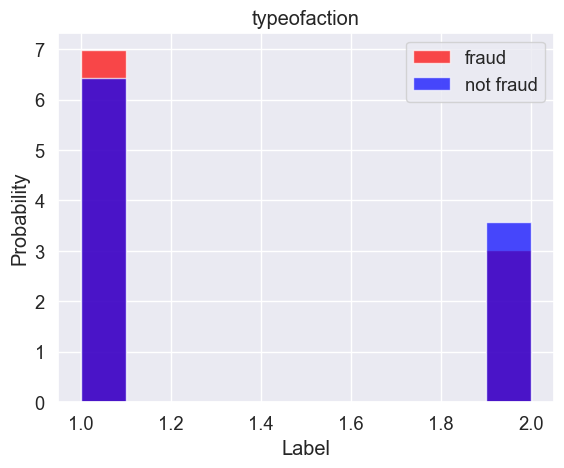

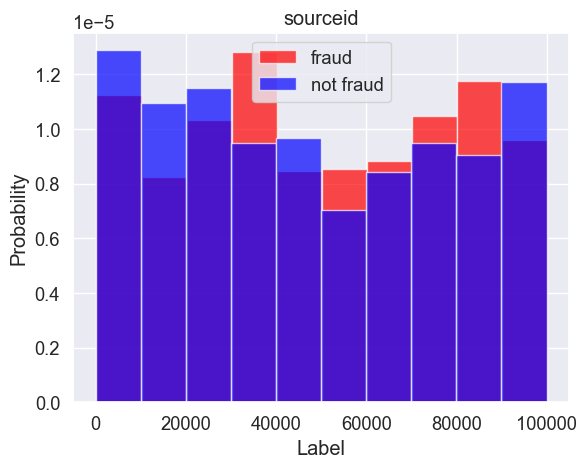

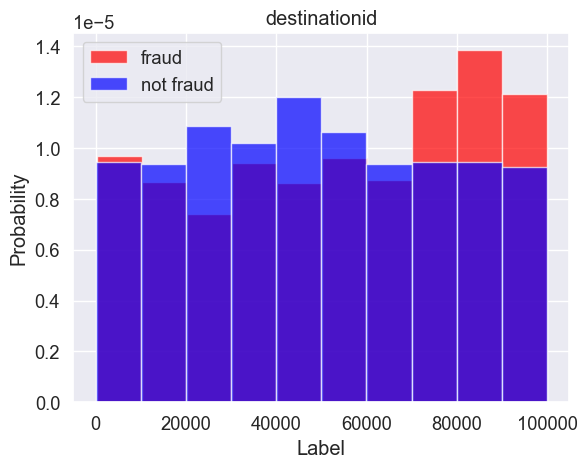

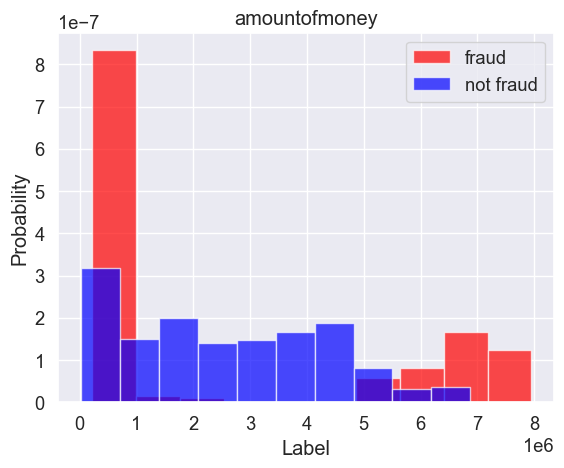

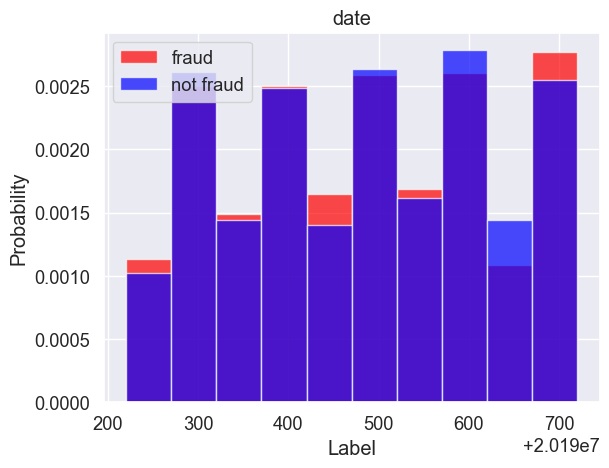

In [53]:
for label in cols[:-2]:
  plt.hist(df[df['isfraud']=='fraud'][label], color='red', label='fraud', alpha=0.7, density=True)
  plt.hist(df[df['isfraud']=='no fraud'][label], color='blue', label='not fraud', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel('Label')
  plt.legend()
  plt.show()

In [54]:
x=df[['typeofaction','sourceid','destinationid','amountofmoney','date']]
y=df.iloc[:,-2]

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
ytrain.value_counts()

isfraud
fraud       1111
no fraud     761
Name: count, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Check the class distribution before oversampling
print("Class distribution before SMOTE:", Counter(ytrain))
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:", Counter(ytrain_resampled))


Class distribution before SMOTE: Counter({'fraud': 1111, 'no fraud': 761})
Class distribution after SMOTE: Counter({'fraud': 1111, 'no fraud': 1111})


In [58]:
xtrain,ytrain=xtrain_resampled, ytrain_resampled

DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain.values,ytrain.values)
ypred = model.predict(xtest.values)

In [60]:
model.score(xtest.values,ytest.values)

0.9487179487179487

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.96      0.95      0.96       288
    no fraud       0.93      0.94      0.93       180

    accuracy                           0.95       468
   macro avg       0.95      0.95      0.95       468
weighted avg       0.95      0.95      0.95       468

[[275  13]
 [ 11 169]]


In [62]:
import seaborn as sns

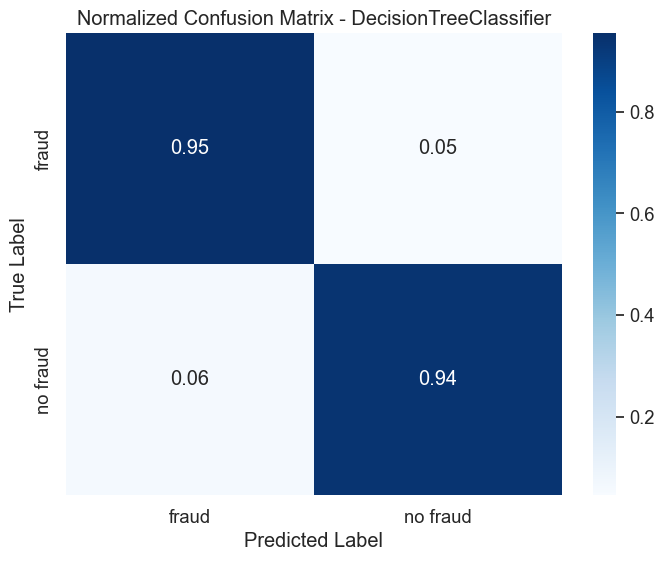

In [63]:
def plot_normalized_confusion_matrix(ytest, ypred, classes, title):
    cm = confusion_matrix(ytest, ypred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Normalized Confusion Matrix - {title}')
    plt.grid(True)
    plt.show()


plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='DecisionTreeClassifier')

In [64]:
model.predict([[2,26390,43793,106907,20190325 ]])  #no fraud

array(['no fraud'], dtype=object)

In [65]:
model.predict([[1,30105,28942,494528,20190719]])  # fraud

array(['fraud'], dtype=object)

## Save the model

In [66]:
from joblib import dump, load
dump(model, 'model.joblib')
model_in = load('model.joblib')

kNN 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain.values,ytrain.values)
ypred = model.predict(xtest.values)

In [68]:
model.score(xtest.values,ytest.values)

0.9273504273504274

In [69]:
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.92      0.97      0.94       288
    no fraud       0.94      0.87      0.90       180

    accuracy                           0.93       468
   macro avg       0.93      0.92      0.92       468
weighted avg       0.93      0.93      0.93       468

[[278  10]
 [ 24 156]]


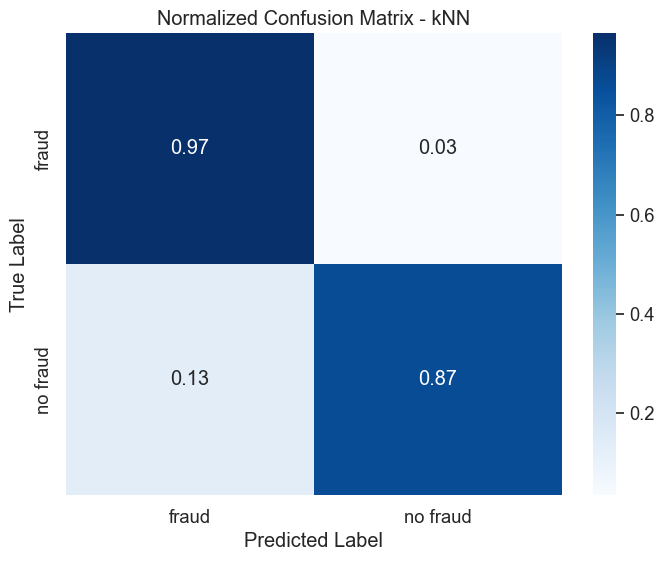

In [70]:
plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='kNN')

In [71]:
print(model.predict([[2,26390,43793,106907,20190325 ]]))  #no fraud
print(model.predict([[1,30105,28942,494528,20190719]]))  # fraud

['no fraud']
['fraud']


Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain.values,ytrain.values)
ypred = model.predict(xtest.values)

In [73]:
model.score(xtest.values,ytest.values)

0.6367521367521367

In [74]:
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.78      0.58      0.66       288
    no fraud       0.52      0.73      0.61       180

    accuracy                           0.64       468
   macro avg       0.65      0.65      0.63       468
weighted avg       0.68      0.64      0.64       468

[[166 122]
 [ 48 132]]


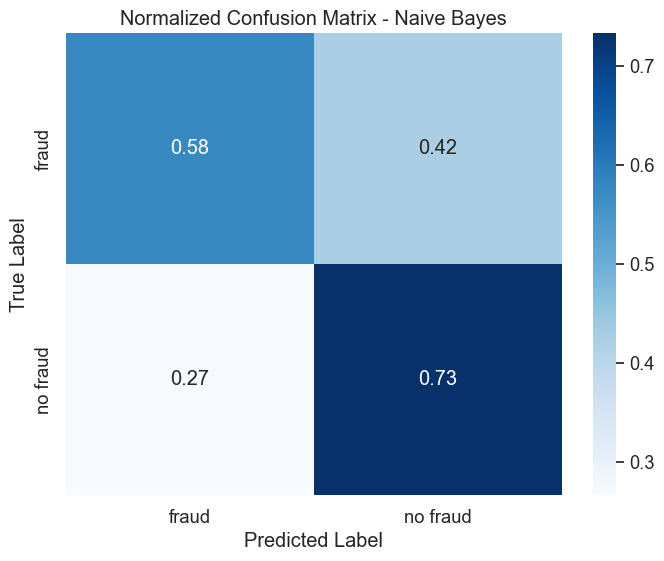

In [75]:
plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='Naive Bayes')

In [76]:
print(model.predict([[2,26390,43793,106907,20190325 ]]))  #no fraud
print(model.predict([[1,30105,28942,494528,20190719]]))  # fraud

['no fraud']
['no fraud']


Log Regression

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain.values,ytrain.values)
ypred = model.predict(xtest.values)

In [78]:
model.score(xtest.values,ytest.values)

0.5192307692307693

In [79]:
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.64      0.51      0.57       288
    no fraud       0.40      0.53      0.46       180

    accuracy                           0.52       468
   macro avg       0.52      0.52      0.51       468
weighted avg       0.55      0.52      0.53       468

[[148 140]
 [ 85  95]]


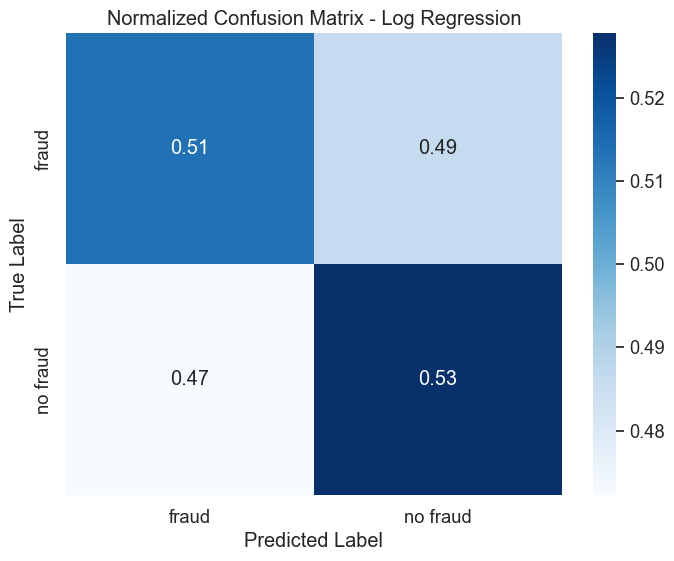

In [80]:
plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='Log Regression')

In [81]:
print(model.predict([[2,26390,43793,106907,20190325 ]]))  #no fraud
print(model.predict([[1,30105,28942,494528,20190719]]))  # fraud

['no fraud']
['no fraud']


SVM

In [82]:
from sklearn.svm import SVC
model = SVC()
model.fit(xtrain.values,ytrain.values)
ypred = model.predict(xtest.values)

In [83]:
model.score(xtest.values,ytest.values)

0.8076923076923077

In [84]:
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

       fraud       0.82      0.88      0.85       288
    no fraud       0.78      0.69      0.74       180

    accuracy                           0.81       468
   macro avg       0.80      0.79      0.79       468
weighted avg       0.81      0.81      0.81       468

[[253  35]
 [ 55 125]]


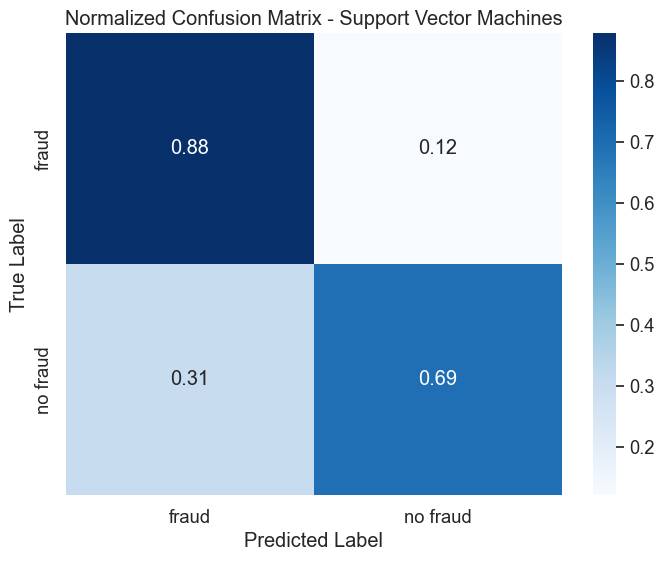

In [85]:
plot_normalized_confusion_matrix(ytest, ypred, classes=["fraud", "no fraud"], title='Support Vector Machines')

In [86]:
print(model.predict([[2,26390,43793,106907,20190325 ]]))  #no fraud
print(model.predict([[1,30105,28942,494528,20190719]]))  # fraud

['fraud']
['fraud']
